In [57]:
import pandas as pd
import numpy as np
from plotnine import *
from tqdm import tqdm_notebook
import os 
import warnings

In [58]:
warnings.filterwarnings(action='ignore')
path = 'C:/Users/choco/Desktop/Github/Github/R-D_Challenge/Challenge19_Car_virus_Detection/input/'

In [59]:
import matplotlib.font_manager as fm
fontpath = 'C:/Users/choco/Anaconda3/lib/site-packages/matplotlib/mpl-data/fonts/ttf/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath).get_name()

In [60]:
HYUNDAI_SONATA_Attack = pd.read_csv(path + 'HYUNDAI_SONATA_Attack_free_TRAIN_Release.csv', header=None)
HYUNDAI_SONATA_Flooding = pd.read_csv(path + 'HYUNDAI_SONATA_Flooding_TRAIN_Release.csv', header=None)
HYUNDAI_SONATA_Fuzzy = pd.read_csv(path + 'HYUNDAI_SONATA_Fuzzy_TRAIN_Release.csv', header=None)
HYUNDAI_SONATA_Malfunction = pd.read_csv(path + 'HYUNDAI_SONATA_Malfunction_TRAIN_Release.csv', header=None)

CHEVORET_SPARK_Attack = pd.read_csv(path + 'CHEVORLET_SPARK_Attack_free_TRAIN_Release.csv', header=None)
CHEVORET_SPARK_Flooding = pd.read_csv(path + 'CHEVORLET_SPARK_Flooding_TRAIN_Release.csv', header=None)
CHEVORET_SPARK_Fuzzy = pd.read_csv(path + 'CHEVORLET_SPARK_Fuzzy_TRAIN_Release.csv', header=None)
CHEVORLET_SPARK_Malfunction = pd.read_csv(path + 'CHEVORLET_SPARK_Malfunction_TRAIN_Release.csv', header=None)

KIA_SOUL_Attack = pd.read_csv(path + 'KIA_SOUL_Attack_free_TRAIN_Release.csv', header=None)
KIA_SOUL_Flooding = pd.read_csv(path + 'KIA_SOUL_Flooding_TRAIN_Release.csv', header=None)
KIA_SOUL_Fuzzy = pd.read_csv(path + 'KIA_SOUL_Fuzzy_TRAIN_Release.csv', header=None)
KIA_SOUL_Malfunction = pd.read_csv(path + 'KIA_SOUL_Malfunction_TRAIN_Release.csv', header=None)

In [61]:
for a in [HYUNDAI_SONATA_Attack, HYUNDAI_SONATA_Flooding, HYUNDAI_SONATA_Fuzzy, HYUNDAI_SONATA_Malfunction]:
    a.columns = ['Timestap', 'CANID', 'DLC', 'DataField', 'Class']
    #a['Class'] = a.Class.map({'R':0, 'T':1})
    
for a in [CHEVORET_SPARK_Attack, CHEVORET_SPARK_Flooding, CHEVORET_SPARK_Fuzzy, CHEVORLET_SPARK_Malfunction]:
    a.columns = ['Timestap', 'CANID', 'DLC', 'DataField', 'Class']
    #a['Class'] = a.Class.map({'R':0, 'T':1})
    
for a in [KIA_SOUL_Attack, KIA_SOUL_Flooding, KIA_SOUL_Fuzzy, KIA_SOUL_Malfunction]:
    a.columns = ['Timestap', 'CANID', 'DLC', 'DataField', 'Class']
    #a['Class'] = a.Class.map({'R':0, 'T':1})

In [62]:
KIA_SOUL_Flooding[KIA_SOUL_Flooding['CANID']=='02A0']['DataField'].unique()

array(['A2 00 69 90 E8 0F 33 03', 'C2 00 69 90 E8 0F 33 03',
       '62 00 69 90 E8 0F 33 03', '02 00 69 90 E8 0F 33 03'], dtype=object)

In [63]:
HYUNDAI = pd.concat([HYUNDAI_SONATA_Attack, HYUNDAI_SONATA_Flooding], axis=0) 
HYUNDAI = pd.concat([HYUNDAI, HYUNDAI_SONATA_Fuzzy], axis=0) 
HYUNDAI = pd.concat([HYUNDAI, HYUNDAI_SONATA_Malfunction], axis=0) 

CHEVORET = pd.concat([CHEVORET_SPARK_Attack, CHEVORET_SPARK_Flooding], axis=0) 
CHEVORET = pd.concat([CHEVORET, CHEVORET_SPARK_Fuzzy], axis=0) 
CHEVORET = pd.concat([CHEVORET, CHEVORLET_SPARK_Malfunction], axis=0) 

KIA = pd.concat([KIA_SOUL_Attack, KIA_SOUL_Flooding], axis=0) 
KIA = pd.concat([KIA, KIA_SOUL_Fuzzy], axis=0) 
KIA = pd.concat([KIA, KIA_SOUL_Malfunction], axis=0) 

TRAIN = pd.concat([HYUNDAI, CHEVORET], axis=0)
TRAIN = pd.concat([TRAIN, KIA], axis=0)

In [64]:
File1 = pd.read_csv(path + 'File_1.csv', header=None)
File2 = pd.read_csv(path + 'File_2.csv', header=None)
File3 = pd.read_csv(path + 'File_3.csv', header=None)
File4 = pd.read_csv(path + 'File_4.csv', header=None)
File7 = pd.read_csv(path + 'File_7.csv', header=None)
File8 = pd.read_csv(path + 'File_8.csv', header=None)
File9 = pd.read_csv(path + 'File_9.csv', header=None)

TEST = pd.DataFrame()
for a in [File1, File2, File3, File4, File7, File8, File9]:
    a.columns = ['Number', 'Timestap', 'CANID', 'DLC', 'DataField']

for df in [File1, File2, File3, File4, File7, File8, File9]:
    TEST = pd.concat([TEST, df], axis=0)
    
TEST = TEST.reset_index(drop=True)
TEST['Number'] = TEST.index + 1
TEST.head()

,Number,Timestap,CANID,DLC,DataField
0,1,1.513920e+09,019D,8,43 2C 3C D3 00 0C 81 7F
1,2,1.513920e+09,018E,8,00 00 00 69 B6 9A 06 9A
2,3,1.513920e+09,01A1,7,00 00 01 41 6A 6A 00
3,4,1.513920e+09,0191,8,06 9B 06 AA 06 9A 00 00
4,5,1.513920e+09,00C1,8,30 F9 05 41 32 85 8B 91


### Data Exploration 

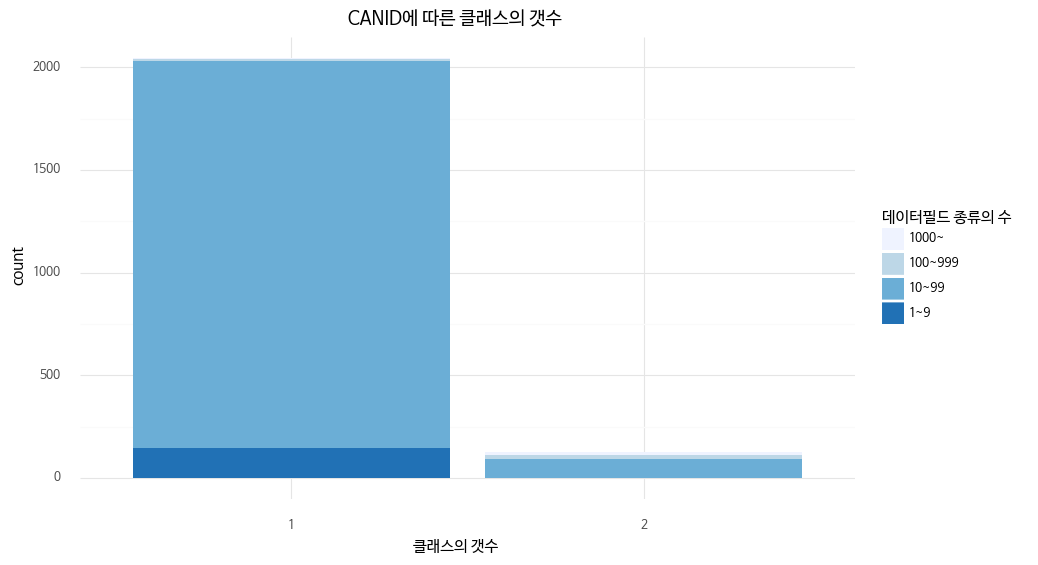

<ggplot: (181698953150)>

In [68]:
agg = TRAIN.groupby(['CANID'])['Class'].agg({'nunique'}).reset_index().rename(columns = {'nunique' : '클래스의 갯수'})
agg1 = TRAIN.groupby(['CANID'])['DataField'].agg({'nunique'}).reset_index().rename(columns = {'nunique' : '데이터필드 종류의 수'})
agg = pd.merge(agg, agg1, how='left')
agg['클래스의 갯수'] = agg['클래스의 갯수'].astype(str)
agg['데이터필드 종류의 수'] = agg['데이터필드 종류의 수'].apply(lambda x: '1~9' if x < 10
                                                              else ('10~99' if ((x < 100)&(x>=10))
                                                                else ('100~999' if ((x<1000)&(x>=100)) else '1000~')))

(ggplot(agg)
 + geom_bar(aes(x='클래스의 갯수',fill = '데이터필드 종류의 수'),  position = "stack") 
 + scale_fill_brewer(palette = "Blues")
 + ggtitle("CANID에 따른 클래스의 갯수") 
 + theme_minimal() + theme(text=element_text(family=font), figure_size=(10, 6)))

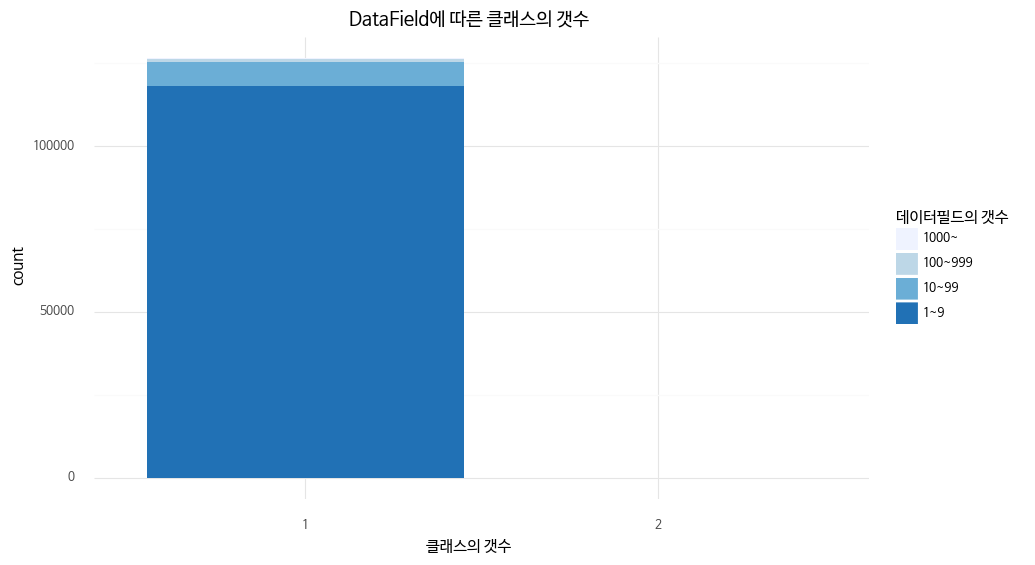

<ggplot: (-9223371855151996437)>

In [69]:
agg = TRAIN.groupby(['DataField'])['Class'].agg({'nunique'}).reset_index().rename(columns = {'nunique' : '클래스의 갯수'})
agg1 = TRAIN.groupby(['DataField'])['Class'].agg({'count'}).reset_index().rename(columns = {'count' : '데이터필드의 갯수'})
agg = pd.merge(agg, agg1, how='left')
agg['클래스의 갯수'] = agg['클래스의 갯수'].astype(str)
agg['데이터필드의 갯수'] = agg['데이터필드의 갯수'].apply(lambda x: '1~9' if x < 10
                                                              else ('10~99' if ((x < 100)&(x>=10))
                                                                else ('100~999' if ((x<1000)&(x>=100)) else '1000~')))

(ggplot(agg)
 + geom_bar(aes(x='클래스의 갯수',fill = '데이터필드의 갯수'),  position = "stack") 
 + scale_fill_brewer(palette = "Blues")
 + ggtitle("DataField에 따른 클래스의 갯수") 
 + theme_minimal() + theme(text=element_text(family=font), figure_size=(10, 6)))

In [70]:
agg['클래스의 갯수'].value_counts()

1    126579
2         1
Name: 클래스의 갯수, dtype: int64

In [71]:
agg[agg['클래스의 갯수'] == '2']

,DataField,클래스의 갯수,데이터필드의 갯수
6,00 00 00 00 00 00 00 00,2,1000~


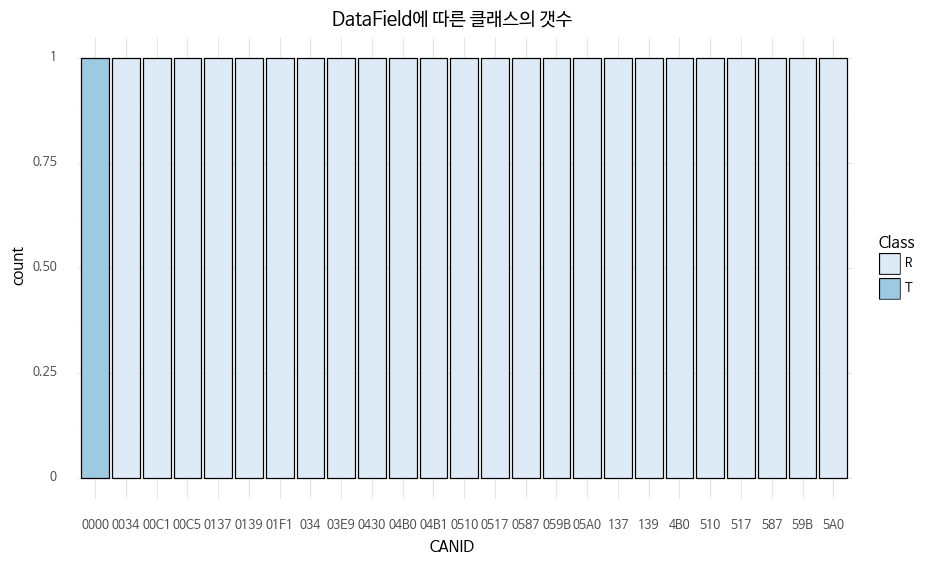

<ggplot: (-9223371855151992537)>

In [73]:
agg1 = TRAIN[TRAIN['DataField']=='00 00 00 00 00 00 00 00'].groupby(['CANID'])['Class'].agg({'nunique','unique'}).reset_index().rename(columns={'nunique':'클래스의 종류의 수', 'unique':'Class'})
agg1['Class'] = agg1['Class'].astype(str).apply(lambda x: x[2])
(ggplot(agg1)
 + geom_bar(aes(x='CANID', fill='Class'),  position = "identity", colour="black") 
 + scale_fill_brewer(palette = "Blues")
 + ggtitle("DataField에 따른 클래스의 갯수") 
 + theme_minimal() + theme(text=element_text(family=font), figure_size=(10, 6)))

### Train과 Test에서 겹치는 유형 
- 1. 첫번째 CANID에 의해서 구분되는 유형. 
- 2. DATAFIELD에 의해서 구분되는 유형. 
- 3. 그렇지 않은 유형 

In [81]:
TEST[TEST['DataField']=='E6 DB D2 A7 21 5E 47 BA']['Timestap'].values

array([1.51392024e+09])

In [83]:
TEST['Timestap'].min()

1513920124.163693